# Plant Disease Detection

## Import Library

In [1]:
import os 
import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import keras 
from keras.callbacks import EarlyStopping,ModelCheckpoint
import tensorflow as tf
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import shutil

## Load Data

In [2]:
# train_dataset, temp_dataset = tf.keras.utils.image_dataset_from_directory(
#     "color",
#     image_size=(224, 224),
#     batch_size=32,
#     shuffle=True,
#     validation_split=0.2,
#     subset="both",
#     seed=42
# )

In [3]:
# class_name = train_dataset.class_names
# class_name

In [4]:
# len(train_dataset), len(train_dataset)*32

In [5]:
# # Split temp_dataset menjadi validation dan test
# test_size = int(0.5 * len(temp_dataset))
# test_dataset = temp_dataset.take(test_size)
# val_dataset = temp_dataset.skip(test_size)

In [6]:
# len(test_dataset), len(val_dataset)

In [7]:
# train_dataset = train_dataset.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
# test_dataset = test_dataset.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
# val_dataset = val_dataset.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [8]:
# from collections import Counter

# label_counter = Counter()
# counter=0
# for images, labels in train_dataset.concatenate(test_dataset).concatenate(val_dataset):
#     label_counter.update(labels.numpy())
#     if counter <= 2:
#         print(label_counter)
#         counter+=1

# print("Data per label:")
# for label, count in sorted(label_counter.items(),key=lambda x:x[1],reverse=True):
#     print(f"Label {class_name[label]}: {count} images")

In [9]:
PATH_DATASET = "./PlantVillage/color"

In [10]:
os.listdir(PATH_DATASET)

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___healthy',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___healthy',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___healthy',
 'Potato___Late_blight',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___healthy',
 'Strawberry___Leaf_scorch',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___healthy',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spid

In [12]:
for class_name in os.listdir(PATH_DATASET):
    for image_path in os.listdir(os.path.join(PATH_DATASET,class_name)):
        print(image_path)

00075aa8-d81a-4184-8541-b692b78d398a___FREC_Scab 3335.JPG
01a66316-0e98-4d3b-a56f-d78752cd043f___FREC_Scab 3003.JPG
01f3deaa-6143-4b6c-9c22-620a46d8be04___FREC_Scab 3112.JPG
0208f4eb-45a4-4399-904e-989ac2c6257c___FREC_Scab 3037.JPG
023123cb-7b69-4c9f-a521-766d7c8543bb___FREC_Scab 3487.JPG
0261a6e4-21f8-481a-8827-b674e6955644___FREC_Scab 3055.JPG
029424b0-0ef5-491b-9ef5-069190d24d8f___FREC_Scab 3504.JPG
03354abb-aa1c-4f9d-a1ef-9f40505cd539___FREC_Scab 3355.JPG
0340dc35-5215-48ab-8db7-06af99fcb358___FREC_Scab 2966.JPG
0395b847-2c73-4674-826f-33a6afb5b4fe___FREC_Scab 3287.JPG
03eccb1a-0368-4ac7-9f48-7546037b775a___FREC_Scab 3334.JPG
0537ad56-3d24-4e97-a947-65b9b37f8988___FREC_Scab 3079.JPG
058d5e64-2c57-45ba-94cb-ac83fd1885a0___FREC_Scab 3181.JPG
0631708e-5bac-4611-8ff9-6d5ee87ce3b3___FREC_Scab 3252.JPG
0672ab32-9fce-41f3-ae69-e39c48a0a292___FREC_Scab 3347.JPG
06cf74b6-d895-4a09-b3b1-bc63579f8c33___FREC_Scab 3128.JPG
073b509f-c1ea-4e61-881b-2e874c5f4199___FREC_Scab 3286.JPG
075b1885-250b-

In [13]:
def load_dataset(dataset_path):
    images = []
    labels = []
    for classfolder in os.listdir(dataset_path):
        subclassfolder = os.path.join(dataset_path, classfolder)
        for image_filename in os.listdir(subclassfolder):
            image_path = os.path.join(subclassfolder, image_filename)
            images.append(image_path)
            labels.append(classfolder)
    df = pd.DataFrame({'image': images, 'label': labels})
    return df

In [14]:
data = load_dataset(PATH_DATASET)
data.head()

image               label
0  ./PlantVillage/color\Apple___Apple_scab\00075a...  Apple___Apple_scab
1  ./PlantVillage/color\Apple___Apple_scab\01a663...  Apple___Apple_scab
2  ./PlantVillage/color\Apple___Apple_scab\01f3de...  Apple___Apple_scab
3  ./PlantVillage/color\Apple___Apple_scab\0208f4...  Apple___Apple_scab
4  ./PlantVillage/color\Apple___Apple_scab\023123...  Apple___Apple_scab

## EDA

In [15]:
data['label'].value_counts().to_frame()

count
label                                                    
Orange___Haunglongbing_(Citrus_greening)             5507
Tomato___Tomato_Yellow_Leaf_Curl_Virus               5357
Soybean___healthy                                    5090
Peach___Bacterial_spot                               2297
Tomato___Bacterial_spot                              2127
Tomato___Late_blight                                 1909
Squash___Powdery_mildew                              1835
Tomato___Septoria_leaf_spot                          1771
Tomato___Spider_mites Two-spotted_spider_mite        1676
Apple___healthy                                      1645
Tomato___healthy                                     1591
Blueberry___healthy                                  1502
Pepper,_bell___healthy                               1478
Tomato___Target_Spot                                 1404
Grape___Esca_(Black_Measles)                         1383
Corn_(maize)___Common_rust_                          1192
Grape___Black_rot                                    1180
Corn_(maize)___healthy                               1162
Strawberry___Leaf_scorch                             1109
Grape___Leaf_blight_(Isariopsis_Leaf_Spot)           1076
Cherry_(including_sour)___Powdery_mildew             1052
Potato___Early_blight                                1000
Potato___Late_blight                                 1000
Tomato___Early_blight                                1000
Pepper,_bell___Bacterial_spot                         997
Corn_(maize)___Northern_Leaf_Blight                   985
Tomato___Leaf_Mold                                    952
Cherry_(including_sour)___healthy                     854
Apple___Apple_scab                                    630
Apple___Black_rot                                     621
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot    513
Strawberry___healthy                                  456
Grape___healthy                                       423
Tomato___Tomato_mosaic_virus                          373
Raspberry___healthy                                   371
Peach___healthy                                       360
Apple___Cedar_apple_rust                              275
Potato___healthy                                      152

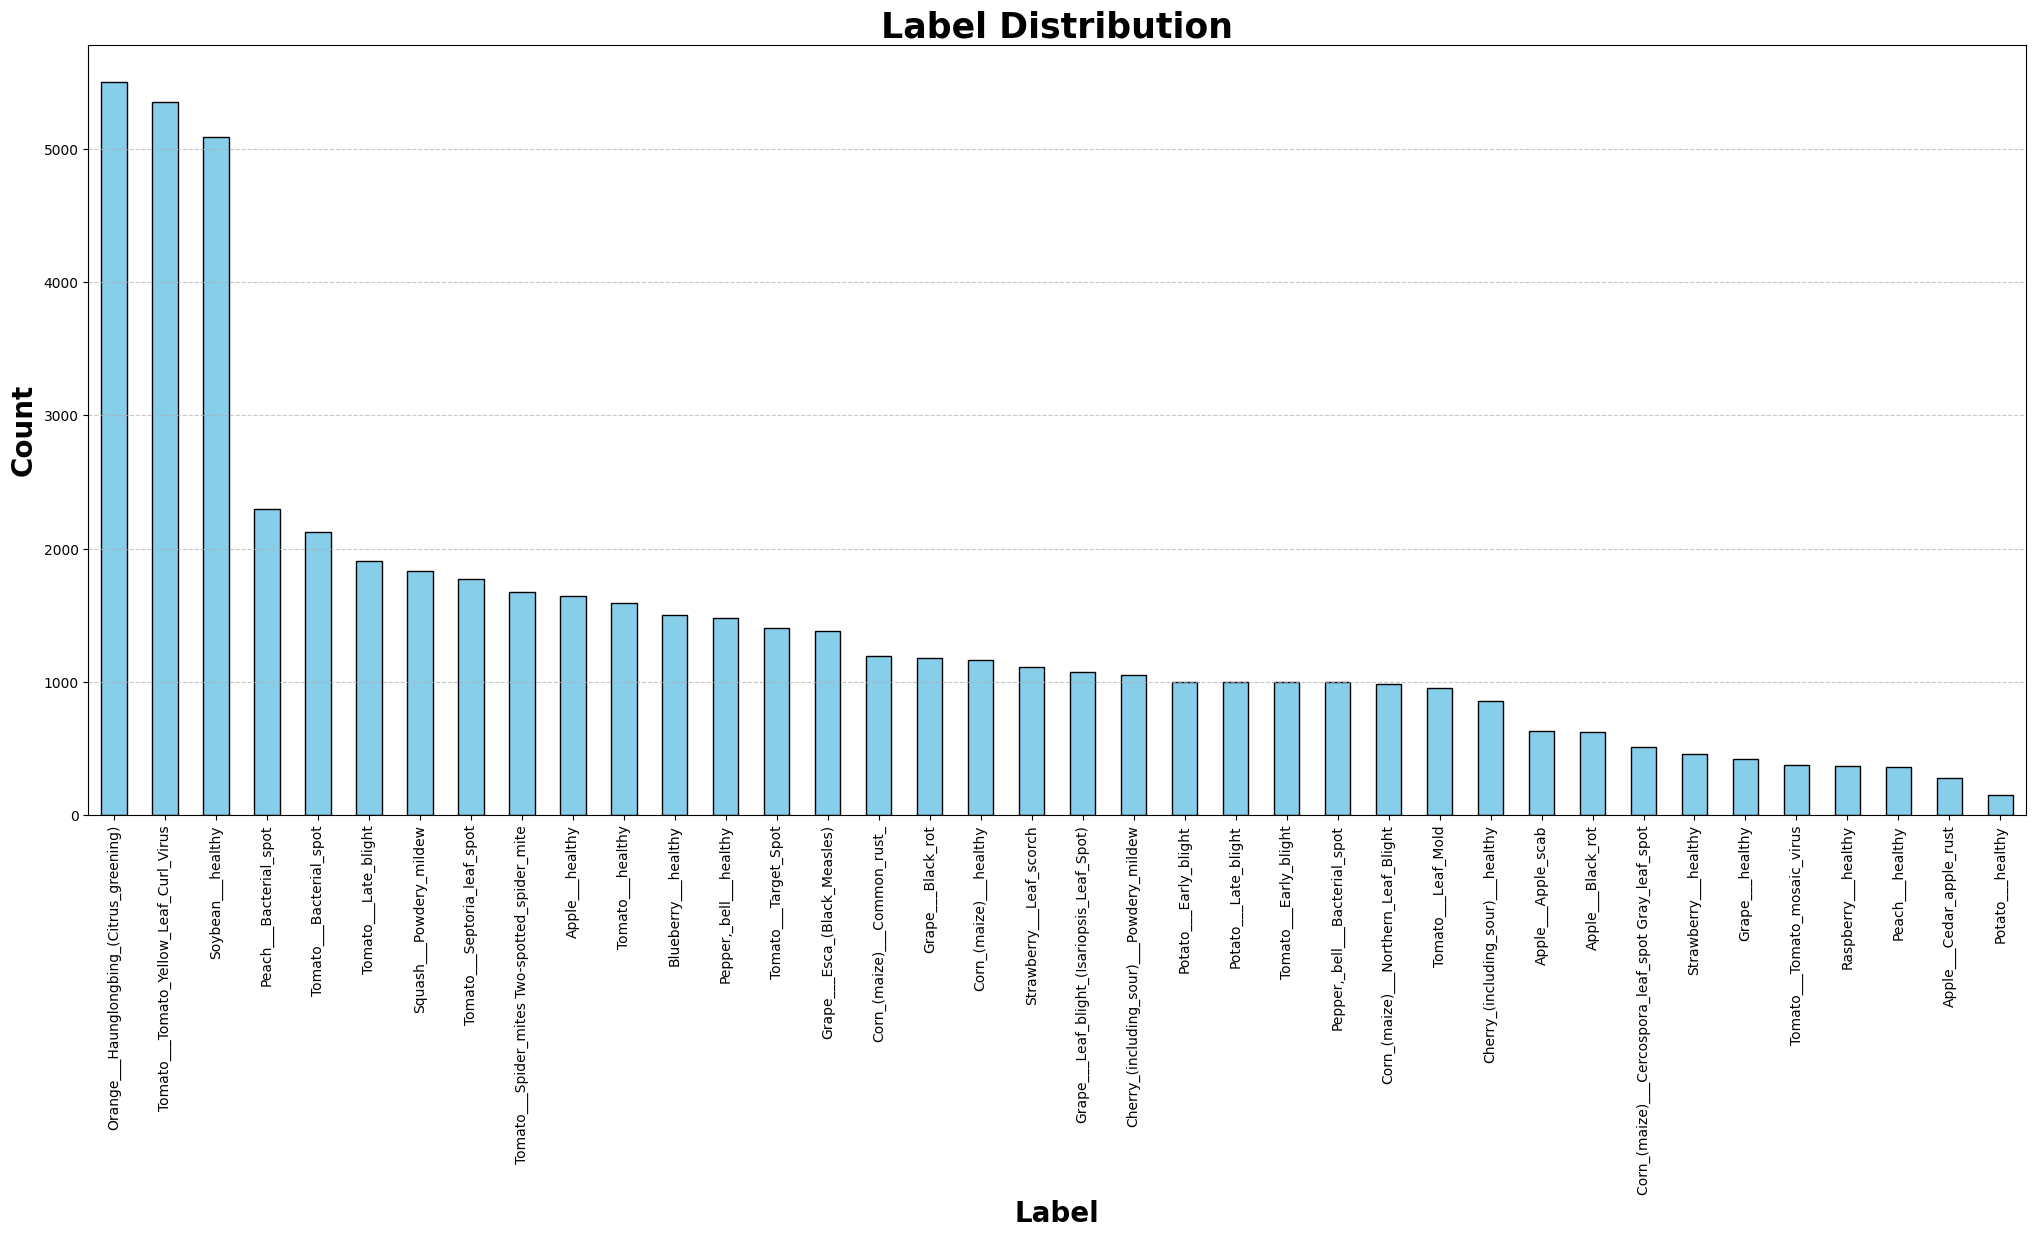

In [ ]:
plt.figure(figsize=(25, 10))
data['label'].value_counts().plot(
    kind='bar',
    color='skyblue',
    edgecolor='black'
)

plt.title("Label Distribution", fontsize=25, fontweight='bold')
plt.xlabel("Label", fontsize=20, fontweight='bold')
plt.ylabel("Count", fontsize=20, fontweight='bold')

# Grid sumbu y
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

In [17]:
dist_data = data['label'].value_counts()

In [18]:
dist_data

label
Orange___Haunglongbing_(Citrus_greening)              5507
Tomato___Tomato_Yellow_Leaf_Curl_Virus                5357
Soybean___healthy                                     5090
Peach___Bacterial_spot                                2297
Tomato___Bacterial_spot                               2127
Tomato___Late_blight                                  1909
Squash___Powdery_mildew                               1835
Tomato___Septoria_leaf_spot                           1771
Tomato___Spider_mites Two-spotted_spider_mite         1676
Apple___healthy                                       1645
Tomato___healthy                                      1591
Blueberry___healthy                                   1502
Pepper,_bell___healthy                                1478
Tomato___Target_Spot                                  1404
Grape___Esca_(Black_Measles)                          1383
Corn_(maize)___Common_rust_                           1192
Grape___Black_rot                                 

In [19]:
plants = dist_data.index
plants[0]

'Orange___Haunglongbing_(Citrus_greening)'

In [20]:
dataset = data.copy()

In [21]:
dataset.head()

image               label
0  ./PlantVillage/color\Apple___Apple_scab\00075a...  Apple___Apple_scab
1  ./PlantVillage/color\Apple___Apple_scab\01a663...  Apple___Apple_scab
2  ./PlantVillage/color\Apple___Apple_scab\01f3de...  Apple___Apple_scab
3  ./PlantVillage/color\Apple___Apple_scab\0208f4...  Apple___Apple_scab
4  ./PlantVillage/color\Apple___Apple_scab\023123...  Apple___Apple_scab

In [22]:
dataset.isnull().sum()

image    0
label    0
dtype: int64

In [23]:
for plant,amount in zip(dist_data.index,dist_data.values):
    if amount>1000:
        dataset[dataset['label']==plant] = data[data['label']==plant].sample(1000,random_state=42, replace=False)

In [24]:
dataset.isnull().sum()

image    22343
label    22343
dtype: int64

In [25]:
dataset.dropna(inplace=True)

In [26]:
dataset.isnull().sum()

image    0
label    0
dtype: int64

In [27]:
dataset['label'].value_counts().to_frame()

count
label                                                    
Pepper,_bell___healthy                               1000
Orange___Haunglongbing_(Citrus_greening)             1000
Tomato___Target_Spot                                 1000
Tomato___Spider_mites Two-spotted_spider_mite        1000
Tomato___Septoria_leaf_spot                          1000
Tomato___Late_blight                                 1000
Tomato___healthy                                     1000
Tomato___Early_blight                                1000
Tomato___Bacterial_spot                              1000
Strawberry___Leaf_scorch                             1000
Squash___Powdery_mildew                              1000
Soybean___healthy                                    1000
Potato___Late_blight                                 1000
Potato___Early_blight                                1000
Peach___Bacterial_spot                               1000
Tomato___Tomato_Yellow_Leaf_Curl_Virus               1000
Grape___Leaf_blight_(Isariopsis_Leaf_Spot)           1000
Grape___Black_rot                                    1000
Apple___healthy                                      1000
Blueberry___healthy                                  1000
Cherry_(including_sour)___Powdery_mildew             1000
Corn_(maize)___Common_rust_                          1000
Corn_(maize)___healthy                               1000
Grape___Esca_(Black_Measles)                         1000
Pepper,_bell___Bacterial_spot                         997
Corn_(maize)___Northern_Leaf_Blight                   985
Tomato___Leaf_Mold                                    952
Cherry_(including_sour)___healthy                     854
Apple___Apple_scab                                    630
Apple___Black_rot                                     621
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot    513
Strawberry___healthy                                  456
Grape___healthy                                       423
Tomato___Tomato_mosaic_virus                          373
Raspberry___healthy                                   371
Peach___healthy                                       360
Apple___Cedar_apple_rust                              275
Potato___healthy                                      152

## Data Augmentation

In [28]:
# datagen = ImageDataGenerator(
#     rotation_range=30,
#     width_shift_range=0.1,
#     height_shift_range=0.1,
#     shear_range=0.2,
#     zoom_range=0.2,
#     horizontal_flip=True,
#     vertical_flip=True,
#     fill_mode='nearest'
# )

In [29]:
dataset.head()

image               label
0  ./PlantVillage/color\Apple___Apple_scab\00075a...  Apple___Apple_scab
1  ./PlantVillage/color\Apple___Apple_scab\01a663...  Apple___Apple_scab
2  ./PlantVillage/color\Apple___Apple_scab\01f3de...  Apple___Apple_scab
3  ./PlantVillage/color\Apple___Apple_scab\0208f4...  Apple___Apple_scab
4  ./PlantVillage/color\Apple___Apple_scab\023123...  Apple___Apple_scab

In [30]:
dataset

image  \
0      ./PlantVillage/color\Apple___Apple_scab\00075a...   
1      ./PlantVillage/color\Apple___Apple_scab\01a663...   
2      ./PlantVillage/color\Apple___Apple_scab\01f3de...   
3      ./PlantVillage/color\Apple___Apple_scab\0208f4...   
4      ./PlantVillage/color\Apple___Apple_scab\023123...   
...                                                  ...   
54277  ./PlantVillage/color\Tomato___Tomato_Yellow_Le...   
54292  ./PlantVillage/color\Tomato___Tomato_Yellow_Le...   
54298  ./PlantVillage/color\Tomato___Tomato_Yellow_Le...   
54299  ./PlantVillage/color\Tomato___Tomato_Yellow_Le...   
54301  ./PlantVillage/color\Tomato___Tomato_Yellow_Le...   

                                        label  
0                          Apple___Apple_scab  
1                          Apple___Apple_scab  
2                          Apple___Apple_scab  
3                          Apple___Apple_scab  
4                          Apple___Apple_scab  
...                                       ...  
54277  Tomato___Tomato_Yellow_Leaf_Curl_Virus  
54292  Tomato___Tomato_Yellow_Leaf_Curl_Virus  
54298  Tomato___Tomato_Yellow_Leaf_Curl_Virus  
54299  Tomato___Tomato_Yellow_Leaf_Curl_Virus  
54301  Tomato___Tomato_Yellow_Leaf_Curl_Virus  

[31962 rows x 2 columns]

In [31]:
type(dataset['image'].iloc[0])

str

In [32]:
datetime.now().timestamp()

1730467306.583041

In [33]:
def augment_and_save(img_path, save_path, datagen, num_aug, index):
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    # print(img)
    x = np.expand_dims(img, axis=0)
    # datagen.fit(x)
        
    os.makedirs(save_path, exist_ok=True)
    # shutil.copy(img_path, save_path)
    
    i = 0
    for batch in datagen.flow(x, save_to_dir=save_path, save_prefix=f'aug_{index}_{datetime.now().timestamp()}_', save_format='jpg'):
        i += 1
        if i == num_aug:
            break

#### Trying different augmentations as a comparison of which results are better.

In [34]:
# Defining augmentations parameters
datagen_1 = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest'
)

datagen_2 = ImageDataGenerator(
    rotation_range=30,
    # width_shift_range=0.1,
    # height_shift_range=0.1,
    # shear_range=0.2,
    # zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest'
)

for label in dataset['label'].unique():
    label_data = dataset[dataset['label'] == label]
    print(label, len(label_data))
    
    # For datasets 630 images or less
    if len(label_data) <= 630:
        num_aug = ((1000 - len(label_data)) // len(label_data)) + 2
        
        for index, (row_idx, row) in enumerate(label_data.iterrows()):
            img_path = row['image']
            save_path_1 = os.path.dirname(img_path).replace("color", "augmented_1")
            save_path_2 = os.path.dirname(img_path).replace("color", "augmented_2")

            augment_and_save(img_path, save_path_1, datagen_1, num_aug, index)
            augment_and_save(img_path, save_path_2, datagen_2, num_aug, index)
        
    # For datasets more than 630 images
    else:
        for index, (row_idx, row) in enumerate(label_data.iterrows()):
            img_path = row['image']
            save_path_1 = os.path.dirname(img_path).replace("color", "augmented_1")
            save_path_2 = os.path.dirname(img_path).replace("color", "augmented_2")

            # Augment all images
            augment_and_save(img_path, save_path_1, datagen_1, 1, index)
            augment_and_save(img_path, save_path_2, datagen_2, 1, index)

Apple___Apple_scab 630
Apple___Black_rot 621
Apple___Cedar_apple_rust 275
Apple___healthy 1000
Blueberry___healthy 1000
Cherry_(including_sour)___healthy 854
Cherry_(including_sour)___Powdery_mildew 1000
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot 513
Corn_(maize)___Common_rust_ 1000
Corn_(maize)___healthy 1000
Corn_(maize)___Northern_Leaf_Blight 985
Grape___Black_rot 1000
Grape___Esca_(Black_Measles) 1000
Grape___healthy 423
Grape___Leaf_blight_(Isariopsis_Leaf_Spot) 1000
Orange___Haunglongbing_(Citrus_greening) 1000
Peach___Bacterial_spot 1000
Peach___healthy 360
Pepper,_bell___Bacterial_spot 997
Pepper,_bell___healthy 1000
Potato___Early_blight 1000
Potato___healthy 152
Potato___Late_blight 1000
Raspberry___healthy 371
Soybean___healthy 1000
Squash___Powdery_mildew 1000
Strawberry___healthy 456
Strawberry___Leaf_scorch 1000
Tomato___Bacterial_spot 1000
Tomato___Early_blight 1000
Tomato___healthy 1000
Tomato___Late_blight 1000
Tomato___Leaf_Mold 952
Tomato___Septoria_leaf_spot

In [35]:
DATA_PATH_AUG_1 = "./PlantVillage/augmented_1"
DATA_PATH_AUG_2 = "./PlantVillage/augmented_2"

In [36]:
dataset_aug1 = load_dataset(DATA_PATH_AUG_1)
print(dataset_aug1['label'].value_counts().to_frame())
dataset_aug1.shape

                                                    count
label                                                    
Strawberry___healthy                                 1368
Grape___healthy                                      1269
Apple___Apple_scab                                   1260
Apple___Black_rot                                    1242
Tomato___Tomato_mosaic_virus                         1119
Raspberry___healthy                                  1113
Apple___Cedar_apple_rust                             1100
Peach___healthy                                      1080
Potato___healthy                                     1064
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot   1026
Soybean___healthy                                    1000
Squash___Powdery_mildew                              1000
Tomato___Early_blight                                1000
Strawberry___Leaf_scorch                             1000
Tomato___Bacterial_spot                              1000
Tomato___healt

(39429, 2)

In [37]:
dataset_aug2 = load_dataset(DATA_PATH_AUG_2)
print(dataset_aug2['label'].value_counts().to_frame())
dataset_aug2.shape

                                                    count
label                                                    
Strawberry___healthy                                 1368
Grape___healthy                                      1269
Apple___Apple_scab                                   1260
Apple___Black_rot                                    1242
Tomato___Tomato_mosaic_virus                         1119
Raspberry___healthy                                  1113
Apple___Cedar_apple_rust                             1100
Peach___healthy                                      1080
Potato___healthy                                     1064
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot   1026
Soybean___healthy                                    1000
Squash___Powdery_mildew                              1000
Tomato___Early_blight                                1000
Strawberry___Leaf_scorch                             1000
Tomato___Bacterial_spot                              1000
Tomato___healt

(39429, 2)

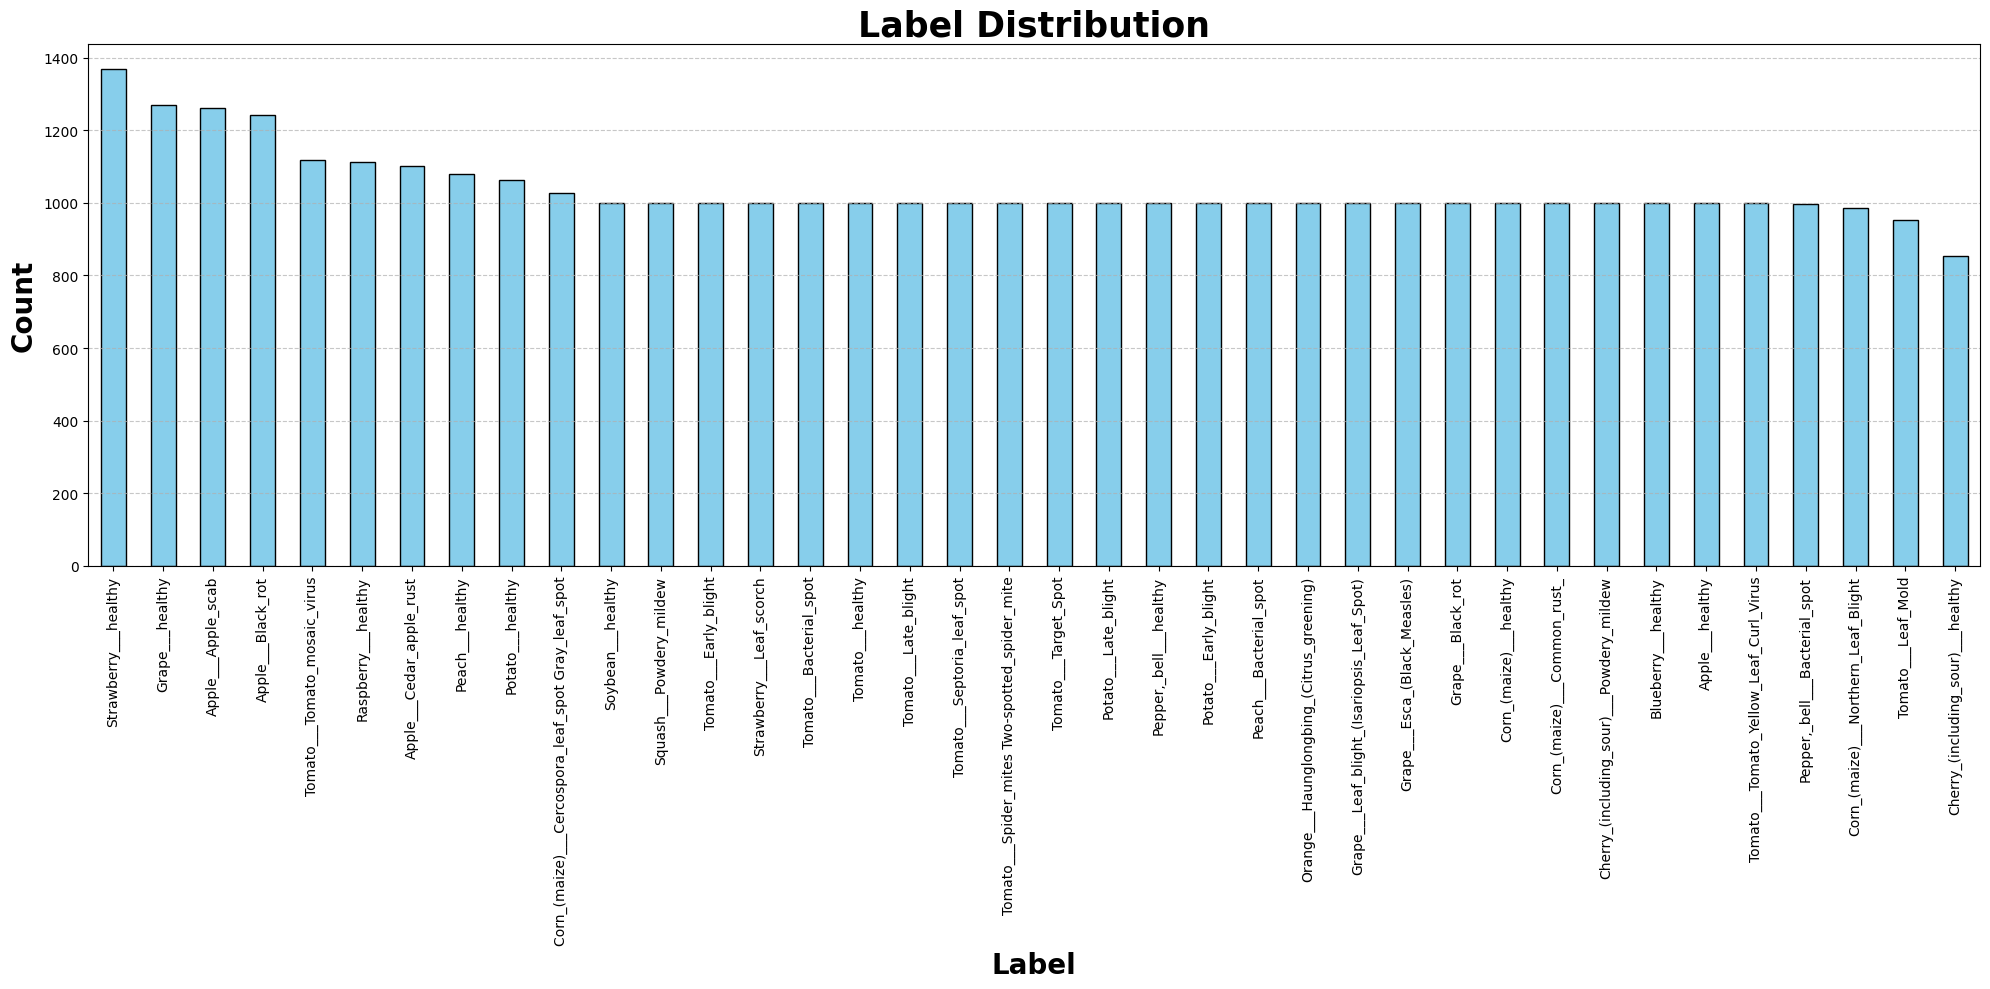

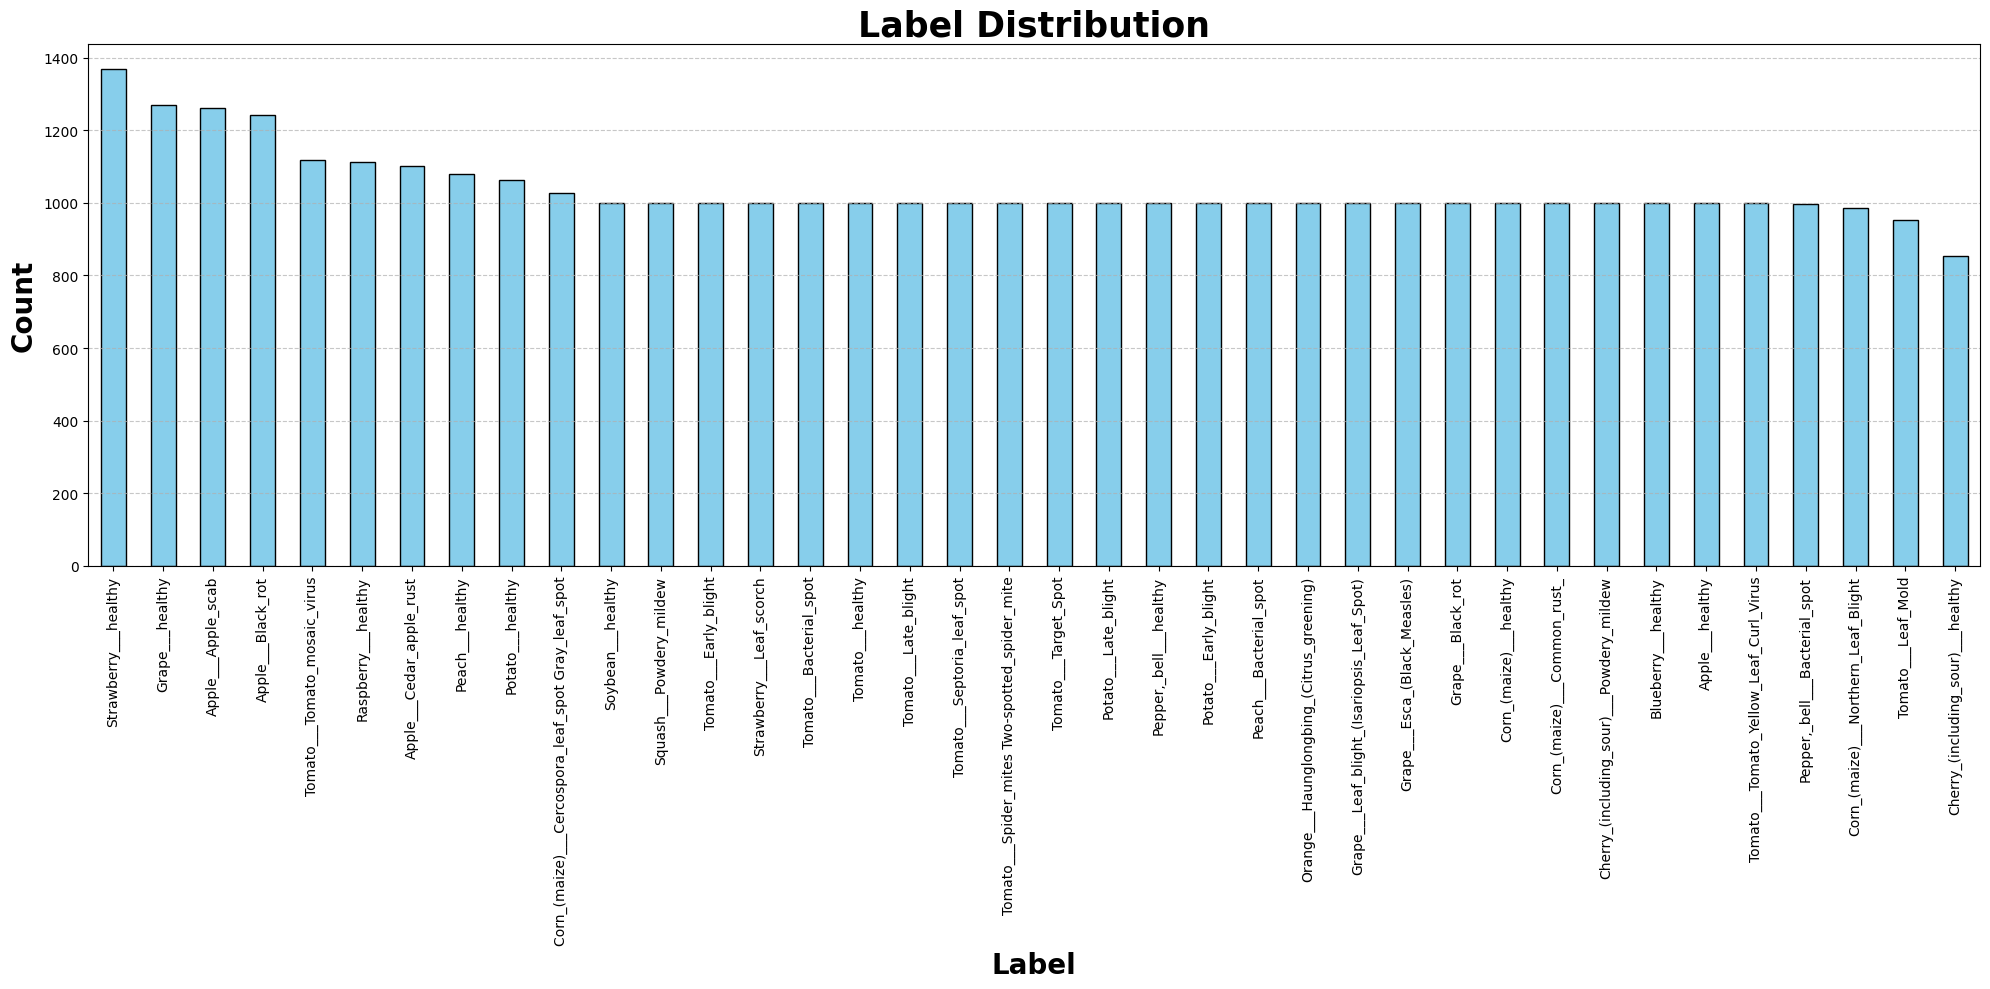

In [38]:
def label_dist(data):
    plt.figure(figsize=(20, 10))
    data['label'].value_counts().plot(
        kind='bar',
        color='skyblue',
        edgecolor='black'
    )
    plt.title("Label Distribution", fontsize=25, fontweight='bold')
    plt.xlabel("Label", fontsize=20, fontweight='bold')
    plt.ylabel("Count", fontsize=20, fontweight='bold')
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    plt.tight_layout()

    plt.show()

label_dist(dataset_aug1)
label_dist(dataset_aug2)

In [39]:
dataset_aug1.shape, dataset_aug2.shape

((39429, 2), (39429, 2))

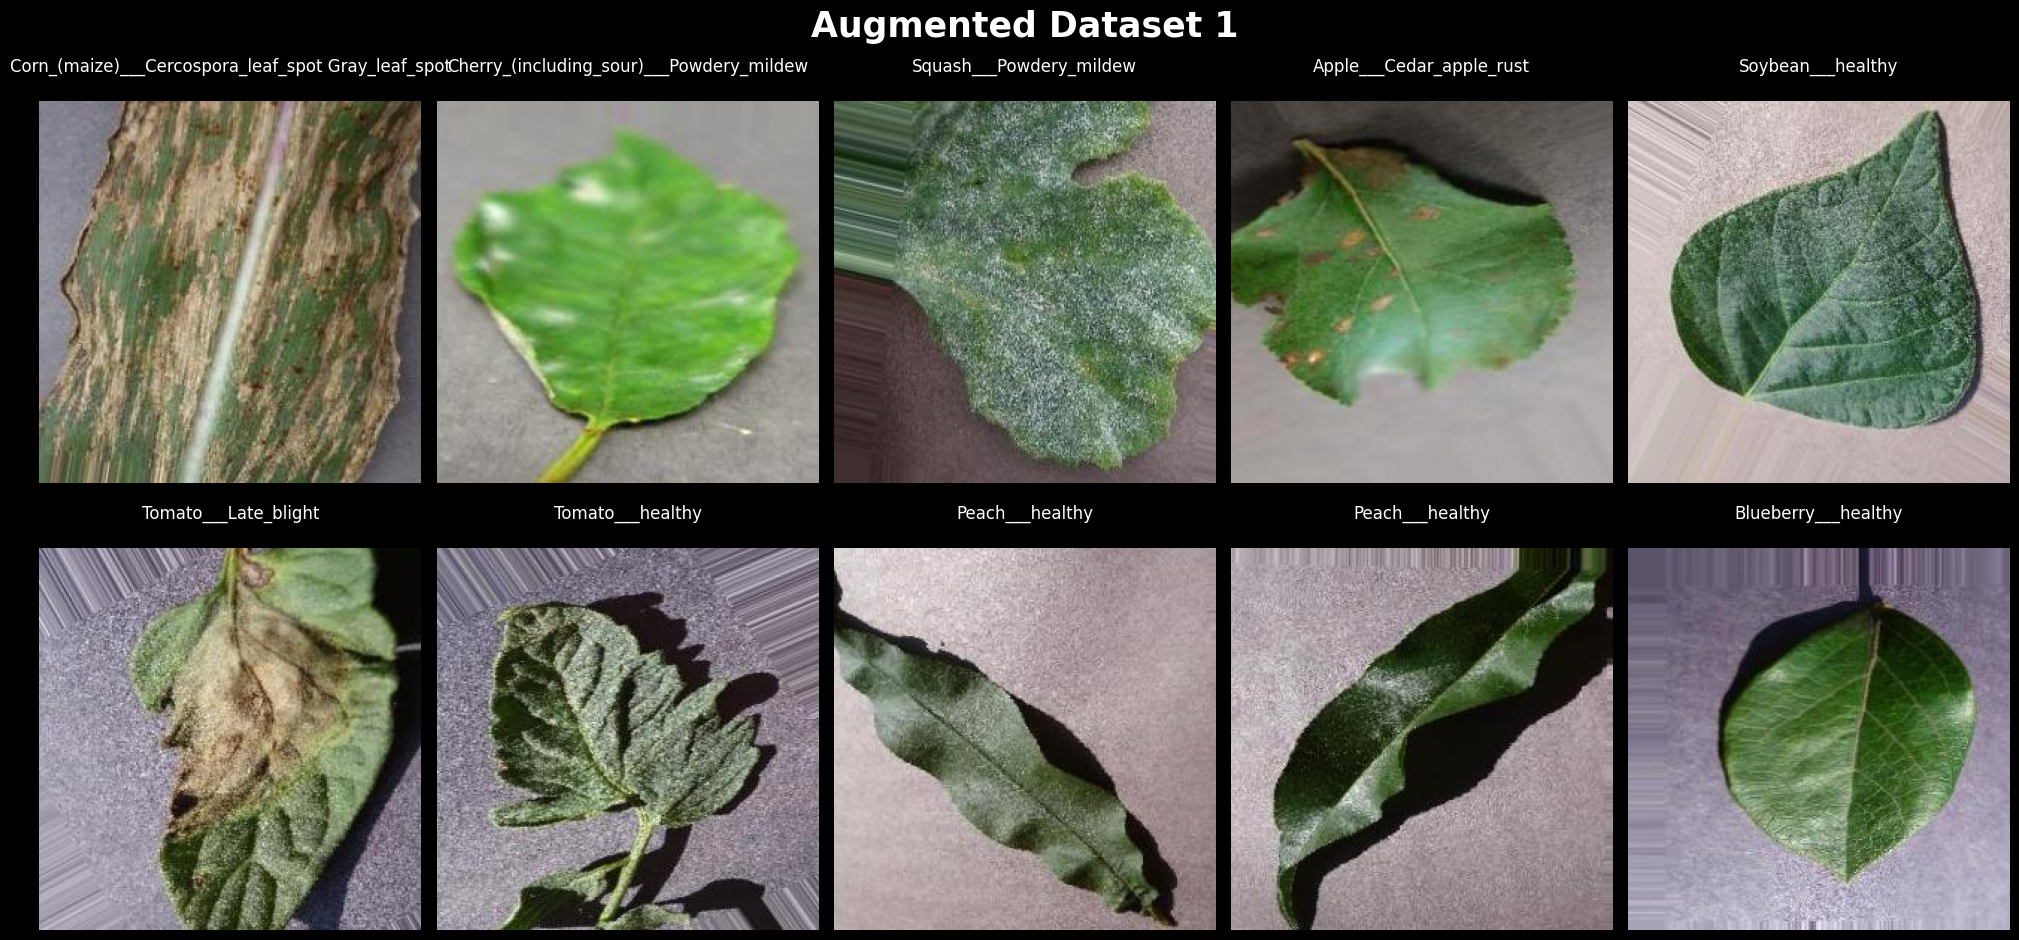

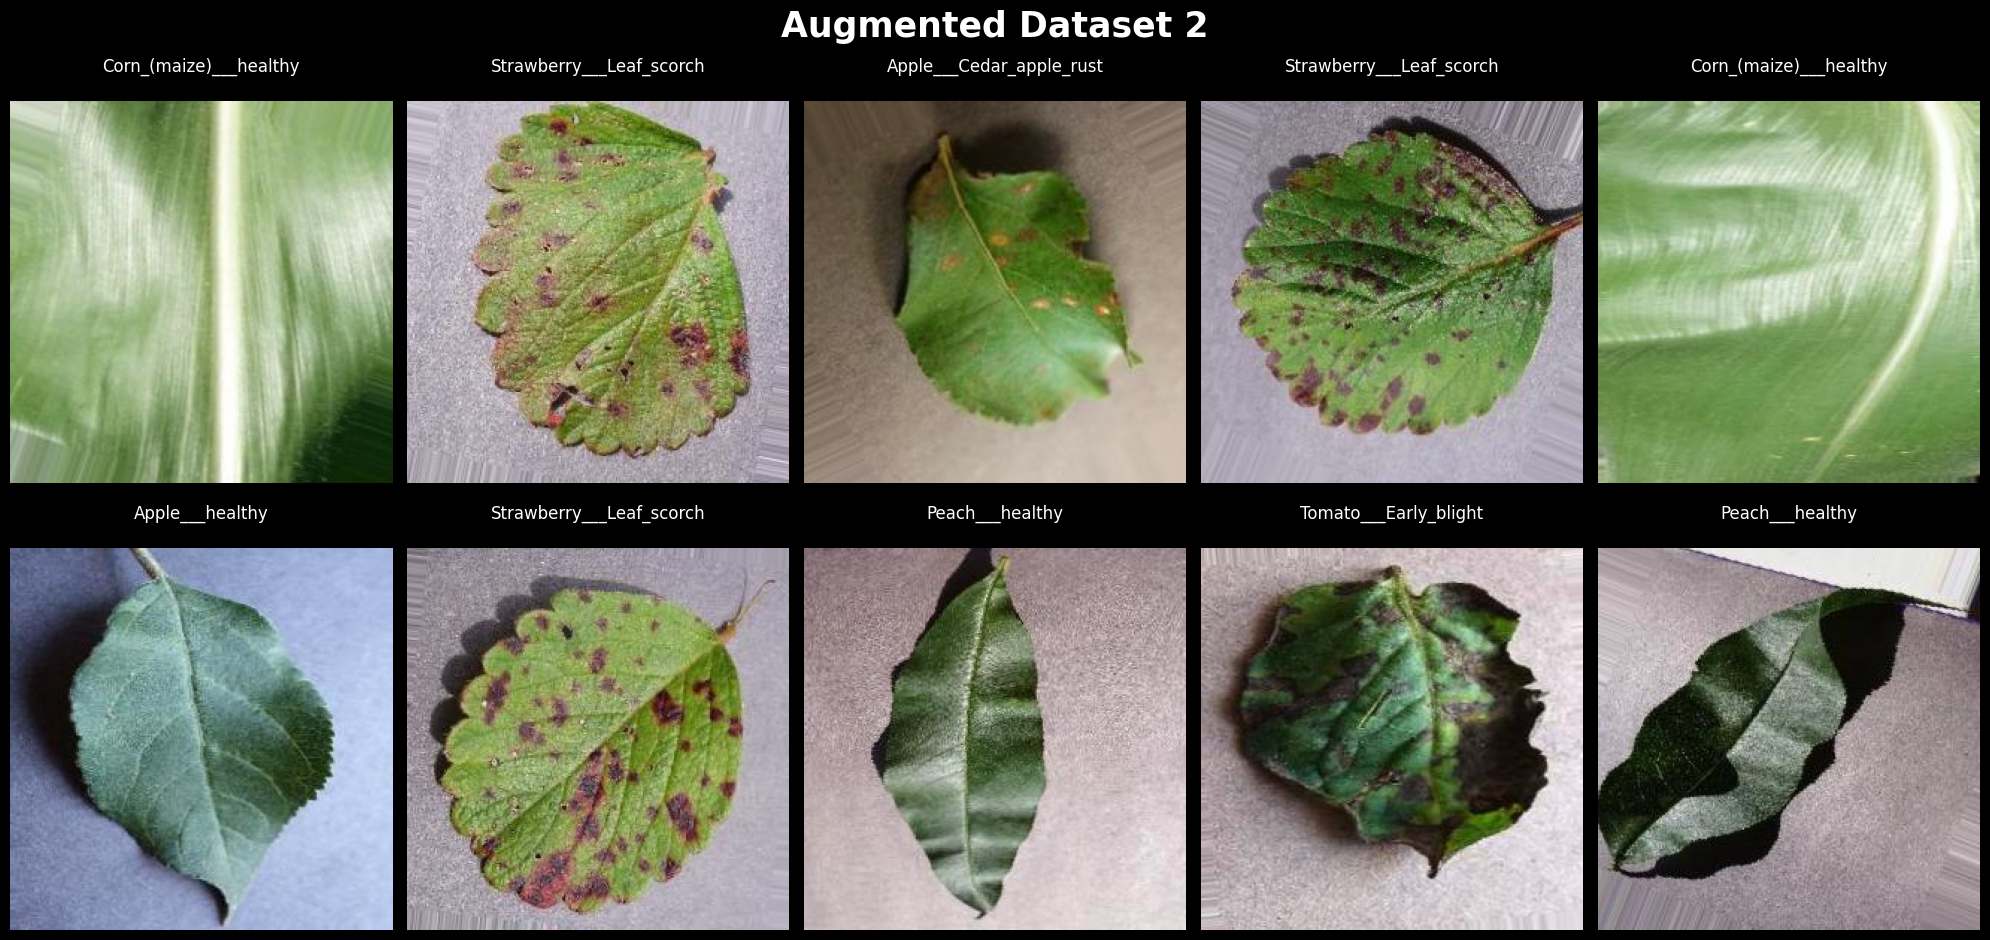

In [40]:
def show_images(data, title):
    plt.style.use('dark_background')
    plt.figure(figsize=(20,10))
    for n,i in enumerate(np.random.randint(0,len(data),10)):
        plt.subplot(2,5,n+1)
        img = cv2.imread(data['image'].iloc[i])
        img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
        plt.imshow(img)
        plt.axis('off')
        plt.title(f'{data.label[i]}\n')
    plt.suptitle(title,fontsize=25, fontweight='bold')
    plt.tight_layout()
    plt.show()

# def show_images(data, title):
#     plt.figure(figsize=(20, 10))
#     for i in range(10):
#         plt.subplot(2, 5, i+1)
#         img = cv2.imread(data['image'].iloc[i])
#         img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
#         plt.imshow(img)
#         plt.title(data['label'].iloc[i])
#         plt.axis('off')
#     plt.suptitle(title, fontsize=25, fontweight='bold')
#     plt.tight_layout()
#     plt.show()
    
show_images(dataset_aug1, "Augmented Dataset 1")
show_images(dataset_aug2, "Augmented Dataset 2")

In [41]:
img = cv2.imread(dataset['image'].iloc[0])
print(img)

[[[196 163 167]
  [195 162 166]
  [194 161 165]
  ...
  [211 182 185]
  [209 180 183]
  [207 178 181]]

 [[199 166 170]
  [198 165 169]
  [197 164 168]
  ...
  [212 183 186]
  [210 181 184]
  [209 180 183]]

 [[199 166 170]
  [198 165 169]
  [197 164 168]
  ...
  [214 185 188]
  [212 183 186]
  [211 182 185]]

 ...

 [[124  90 100]
  [126  92 102]
  [128  94 104]
  ...
  [137 110 126]
  [137 110 126]
  [137 110 126]]

 [[125  91 101]
  [126  92 102]
  [127  93 103]
  ...
  [133 106 122]
  [134 107 123]
  [134 107 123]]

 [[128  94 104]
  [127  93 103]
  [126  92 102]
  ...
  [132 105 121]
  [133 106 122]
  [134 107 123]]]


In [42]:
!pip list

Package                      Version
---------------------------- ---------
absl-py                      2.1.0
asttokens                    2.4.1
astunparse                   1.6.3
cachetools                   5.5.0
certifi                      2024.8.30
charset-normalizer           3.4.0
colorama                     0.4.6
comm                         0.2.2
contourpy                    1.3.0
cycler                       0.12.1
debugpy                      1.8.7
decorator                    5.1.1
exceptiongroup               1.2.2
executing                    2.1.0
flatbuffers                  24.3.25
fonttools                    4.54.1
gast                         0.4.0
google-auth                  2.35.0
google-auth-oauthlib         0.4.6
google-pasta                 0.2.0
grpcio                       1.66.2
h5py                         3.12.1
idna                         3.10
importlib_metadata           8.5.0
ipykernel                    6.29.5
ipython                      8.28.0
je